In [2]:
import numpy as np
import sympy as sp
from scipy.sparse import dok_matrix
from numpy import linalg as la

#PAGERANK Problem 1

def AMAT(name, N):
    with open(name, 'r') as myfile:
        nodes = []
        for line in myfile.readlines()[1:]:
            for node in line.strip().split():
                nodes.append(node)
    m = int(len(nodes)/2)

    nodescopy = sorted(list(set([node.rstrip("\n") for node in nodes])))
    print("nodescopy",nodescopy)
    adj = np.asarray([node.rstrip("\n") for node in nodes]).reshape(m,2)
    print("adj",adj)
    A = dok_matrix((N,N))
    for row in adj:
        i = nodescopy.index(row[0])
        j = nodescopy.index(row[1])
        A[i,j] = A[i,j] + 1
        
    return A

 
A = np.array([[ 0,  0,  0,  0,  0,  0,  0,  1],
          [ 1,  0,  0,  0,  0,  0,  0,  0],
          [ 0,  0,  0,  0,  0,  0,  0,  0],
          [ 1,  0,  1,  0,  0,  0,  1,  0],
          [ 1,  0,  0,  0,  0,  1,  1,  0],
          [ 1,  0,  0,  0,  0,  0,  1,  0],
          [ 1,  0,  0,  0,  0,  0,  0,  0],
          [ 1,  0,  0,  0,  0,  0,  0,  0]])
print(AMAT("matrix.txt", 8) == A)

nodescopy ['0', '1', '2', '3', '4', '5', '6', '7']
adj [['0' '7']
 ['1' '0']
 ['3' '0']
 ['3' '2']
 ['3' '6']
 ['4' '0']
 ['4' '5']
 ['4' '6']
 ['5' '0']
 ['5' '6']
 ['6' '0']
 ['7' '0']]
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [3]:
#PAGERANK Problem 2
#Note that a node is a sink if its row sum in the adjacency matrix is equal to 0

def KMAT(A):
    A = np.asarray(A)

    sink = np.where(~A.any(axis = 1))
    Am = np.copy(A)
   
    for rowindex in sink:
        Am[rowindex] = np.repeat(1, len(A))
    
    rowsum = np.sum(Am, axis = 1)
    D = rowsum
    K = (Am.T / D)
    
    
    return K

print(KMAT(A))
 

[[ 0.          1.          0.125       0.33333333  0.33333333  0.5         1.
   1.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333333  0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.33333333  0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333333  0.33333333  0.5         0.
   0.        ]
 [ 1.          0.          0.125       0.          0.          0.          0.
   0.        ]]


In [4]:
#PAGERANK Problem 3
def steadystate(A, N = None, d = 0.85):
    K = KMAT(A)
    A = np.asarray(A)
    I = np.eye(N)
    p = np.random.choice(5, N)
    p = [float(i)/sum(p) for i in p]
    
    diff = 5
    eps = 1e-10
    
    while diff > eps:
        pold = np.copy(p)
        p = d * K @ p + ((1-d) / N) * np.ones(N)
        diff = (np.absolute(pold - p)).max()
        
    return p

print(steadystate(A, 8))

[ 0.43869288  0.02171029  0.02786154  0.02171029  0.02171029  0.02786154
  0.04585394  0.39459924]


In [5]:
#PAGERANK Problem 4

def dominant(A,N,tol):
    m = A.shape[0]
    n = A.shape[1]
    x = np.random.random((n,1))
    x = x/la.norm(x)
    diff = 1
    k = 0
    while ((diff > tol) & (k < N)):
        xnew = (A @ x)
        xnew = xnew/la.norm(xnew)
        diff = la.norm(xnew - x)
        x = xnew.copy()
        del(xnew)
        k = k + 1

    return x.T @ A @ x, x



def steadystate_eig(A, N = None, d = 0.85):
    K = KMAT(A)
    E = np.ones(N)
    B = d * K + ((1 - d)/N) * E
    p = dominant(B, 1000, 1e-5)[1]
    sump = sum(p)
    p = p/sump
    return p

print(steadystate_eig(A, 8))

[[ 0.43869468]
 [ 0.02171029]
 [ 0.02786154]
 [ 0.02171029]
 [ 0.02171029]
 [ 0.02786154]
 [ 0.04585394]
 [ 0.39459744]]


In [6]:
#PAGERANK Problem 5

def AMAT1(name):
    
    with open(name, 'r') as myfile:
        nodes = []
        for line in myfile.readlines()[1:]:
            for node in line.split(","):
                nodes.append(node)
    
    m = int(len(nodes)/2)
    nodescopy = sorted(list(set([node.rstrip("\n") for node in nodes])))
    adj = np.asarray([node.rstrip("\n") for node in nodes]).reshape(m,2)
    A = np.zeros((len(nodescopy),len(nodescopy)))
    for row in adj:
        i = nodescopy.index(row[0])
        j = nodescopy.index(row[1])
        A[j,i] = 1
    
    ranks = steadystate(A, len(nodescopy), d = 0.7).reshape(len(nodescopy),1)
    nodescopy = np.asarray(nodescopy).reshape(len(nodescopy),1)
    rankmat = np.hstack((nodescopy,ranks))
    rankmat = rankmat[rankmat[:,1].argsort()[::-1]]
    print(rankmat)
    return rankmat

amat = AMAT1("ncaa2013.csv")

[['Duke' '0.009656735754448255']
 ['Butler' '0.008535400721444488']
 ['Louisville' '0.008494955681692794']
 ['Illinois' '0.008332028392949914']
 ['Indiana' '0.008221514610742395']
 ['Miami FL' '0.008146683748073846']
 ['Syracuse' '0.007891882113212269']
 ['Ohio St' '0.007775237795716629']
 ['Michigan St' '0.00761891915755442']
 ['Kansas' '0.0075838064715706335']
 ['Minnesota' '0.007511047912064766']
 ['Michigan' '0.007397245560931162']
 ['Georgetown' '0.007390067081967028']
 ['Wisconsin' '0.006877484399696034']
 ['St Louis' '0.006749911057674601']
 ['New Mexico' '0.006671311210632516']
 ['Virginia' '0.006671146725012674']
 ['Marquette' '0.006560217935520489']
 ['Notre Dame' '0.006555148974452041']
 ['NC State' '0.006545229571796952']
 ['VA Commonwealth' '0.006392801287709799']
 ['Oklahoma St' '0.006344746545425745']
 ['Florida' '0.006337529663386257']
 ['Villanova' '0.006324925466414824']
 ['Temple' '0.0063051571808567805']
 ['Arizona' '0.006106811228070044']
 ['UNLV' '0.00606264110486

In [7]:
#CONDITIONING Problem 1
from scipy import linalg as la
A = np.array([[1,2],[3,4]])
def condition(A):
    sv = la.svdvals(A)
    svmax = max(sv)
    svmin = min(sv)
    if svmin == 0:
        return np.inf
    else:
        K = svmax / svmin
    return K

print("MY ANSWER: ", condition(A))
print("NUMPY'S ANSWER: ", np.linalg.cond(A))

orth = np.array([[1,0],[0,1]])
sing = np.array([[1,0],[0,0]])
print("Orthonormal matrix's condition: ", condition(orth))
print("Singular matrix's condition: ", condition(sing))



MY ANSWER:  14.9330343737
NUMPY'S ANSWER:  14.9330343737
Orthonormal matrix's condition:  1.0
Singular matrix's condition:  inf


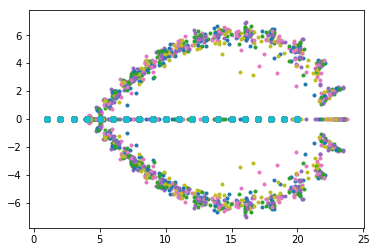

4.36747385882932e+25


In [8]:
#CONDITIONING Problem 2
from matplotlib import pyplot as plt
import sympy as sy

def wilkinson():
    for j in range(100):
        w_roots = np.arange(1,21)
        x,  i = sy.symbols('x i')
        w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
        
        w_coeffs = np.array(w.all_coeffs())
        new_coeffs = np.copy(w_coeffs)
        
        for i in range(len(new_coeffs)):
            new_coeffs[i] = new_coeffs[i] * np.random.normal(1, 10e-10)
            
        h = np.zeros(21)
        h[1]=1e-7

        new_roots = np.roots(new_coeffs)
        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)
        k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)

        plt.scatter(new_roots.real, new_roots.imag, marker = '.')
        plt.scatter(w_roots.real, w_roots.imag)

    plt.show()
    return k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
    
print(wilkinson())
    
    

In [18]:
#CONDITIONING Problem 3

def condition_est(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    Abar = A + H
    evalues_A = la.eigvals(A)
    evalues_Abar = la.eigvals(Abar)
    K_hat = la.norm(evalues_A - evalues_Abar)/la.norm(H)
    K = la.norm(A)*K_hat/la.norm(evalues_A)
    return K_hat, K

print(condition_est(A))


(0.33226000651991222, 0.33794007620094751)


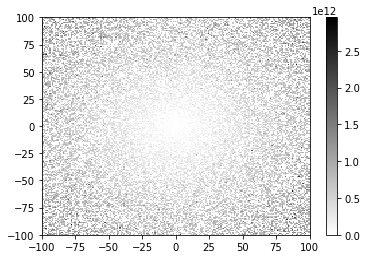

In [31]:
#CONDIITIONING Problem 4
def getmat(x,y):
    A = np.array([[1,x],[y,1]])
    return A

def resolution(xmin, xmax, ymin, ymax, res):
    
    xvec = np.linspace(xmin, xmax, res)
    yvec = np.linspace(ymin, ymax, res)
    zvec = np.zeros((res, res))
    
    for i in range(res): #loop over xvec
        for j in range(res): #loop over yvec
            A = getmat(xvec[i], yvec[j])
            zvec[i,j] = condition_est(A)[1]
    
    plt.pcolormesh(xvec,yvec,zvec, cmap = 'gray_r')
    plt.colorbar()
    plt.show()
        
resolution(-100,100,-100,100,200)

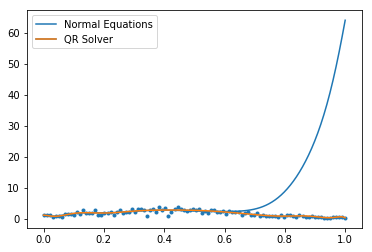

Normal Equations 
 [ -7.66616491e+04   1.48146119e+05   2.47646334e+05  -7.23672014e+05
  -1.39533785e+05   2.01096280e+06  -2.71905138e+06   1.74399461e+06
  -5.49052946e+05   3.52181893e+04   3.07342783e+04  -9.76671206e+03
   1.14167987e+03  -4.28343696e+01   1.27155211e+00]
QR Decomposition 
 [ -9.45621067e+06   6.62579037e+07  -2.08103552e+08   3.86657583e+08
  -4.72212316e+08   3.98175538e+08  -2.36823643e+08   9.96324432e+07
  -2.92403232e+07   5.78803296e+06  -7.24564873e+05   5.05308373e+04
  -1.42447803e+03   1.40662429e+00   1.15251488e+00]
Normal Equations Error:  152.14373083716285
QR Decomposition Error:  4.568370945324403


In [50]:
#CONDIITIONING Problem 5

def coef(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)    
    xhat = la.inv(A.T @ A) @ A.T @ yk
    
    Q, R = la.qr(A, mode = "economic")
    xhat_qr = la.solve_triangular(R, (Q.T) @ yk)
    
    yhat = np.polyval(xhat, xk)
    yhat_qr = np.polyval(xhat_qr,xk)
    
    plt.scatter(xk,yk, marker = ".")
    p1a, = plt.plot(xk,yhat)
    p1b, = plt.plot(xk,yhat_qr)
    plt.legend([p1a, (p1a,p1b)],["Normal Equations", "QR Solver"])
    plt.show()
    
    error = la.norm(yhat - yk)
    error_qr = la.norm(yhat_qr - yk)
    
    print("Normal Equations",  '\n', xhat)
    print("QR Decomposition",  '\n', xhat_qr)
    print("Normal Equations Error: ", error)
    print("QR Decomposition Error: ", error_qr)

    return

coef(14)

In [101]:
#CONDITIONING Problem 6

def problem6():
    x = sy.symbols("x")
    n = sy.symbols("n")
    
    ans_int_vec = np.zeros((10,1))
    ans_fac_vec = np.zeros((10,1))
    error_fac_vec = np.zeros((10,1))
    
    for n in range(5, 55, 5):
        ans_int = sy.integrate((x**(n))*sy.exp((x-1)), (x,0,1))
        i = int(n/5) - 1
        ans_int_vec[i] = ans_int
                        
    print("ANS_INTEGRATE_VEC: ", '\n', ans_int_vec)
    
    for n in range(5, 55, 5):
        ans_fac = float(((-1)**(n))*sy.subfactorial(n) + ((-1)**(n+1))*sy.factorial(n)/sy.exp(1))
        i = int(n/5) - 1
        ans_fac_vec[i] = ans_fac
        error_fac_vec[i] = float(la.norm(ans_int_vec[i] - ans_fac_vec[i])/la.norm(ans_int_vec[i]))
    
    print("ANS_FACTORIAL_VEC: ", '\n',ans_fac_vec)
    print("ERROR_FACTORIAL_VEC: ", '\n',error_fac_vec)
    
    plt.yscale('log')

    return

problem6()
    

ANS_INTEGRATE_VEC:  
 [[ 0.14553294]
 [ 0.08387707]
 [ 0.05901754]
 [ 0.04554488]
 [ 0.03708621]
 [ 0.03127967]
 [ 0.02704629]
 [ 0.02382273]
 [ 0.02128604]
 [ 0.01923775]]
ANS_FACTORIAL_VEC:  
 [[ 0.14553294]
 [ 0.08387707]
 [ 0.05901754]
 [ 0.04554488]
 [ 0.03708621]
 [ 0.03127967]
 [ 0.02704629]
 [ 0.02382273]
 [ 0.02128604]
 [ 0.01923775]]
ERROR_FACTORIAL_VEC:  
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


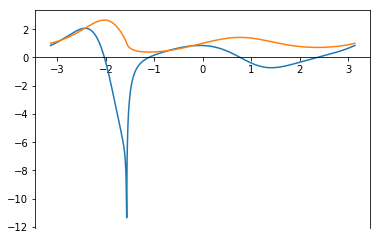

array([  8.41470985e-01,   8.51255271e-01,   8.61116810e-01,
         8.71056067e-01,   8.81073480e-01,   8.91169458e-01,
         9.01344383e-01,   9.11598605e-01,   9.21932441e-01,
         9.32346177e-01,   9.42840061e-01,   9.53414308e-01,
         9.64069090e-01,   9.74804543e-01,   9.85620761e-01,
         9.96517792e-01,   1.00749564e+00,   1.01855427e+00,
         1.02969357e+00,   1.04091342e+00,   1.05221362e+00,
         1.06359391e+00,   1.07505399e+00,   1.08659349e+00,
         1.09821199e+00,   1.10990898e+00,   1.12168391e+00,
         1.13353616e+00,   1.14546502e+00,   1.15746972e+00,
         1.16954942e+00,   1.18170319e+00,   1.19393001e+00,
         1.20622880e+00,   1.21859837e+00,   1.23103746e+00,
         1.24354469e+00,   1.25611861e+00,   1.26875766e+00,
         1.28146018e+00,   1.29422440e+00,   1.30704844e+00,
         1.31993032e+00,   1.33286793e+00,   1.34585905e+00,
         1.35890133e+00,   1.37199231e+00,   1.38512937e+00,
         1.39830979e+00,

In [152]:
#DIFFERENTIATION Problem 1

from sympy.utilities.lambdify import lambdify
from matplotlib import pyplot as plt

def f(x):
    return (np.sin(x) + 1)**(np.sin(np.cos(x)))

def derivative(xvec):
    func = lambdify(x, sy.diff((sy.sin(x) + 1)**(sy.sin(sy.cos(x)))),'numpy') # returns a numpy-ready function
    fvec = np.vectorize(f)
    yvec = fvec(xvec)
    yvecprime = func(xvec)
    plt.plot(xvec, yvecprime)
    plt.plot(xvec, yvec)
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.plot
    plt.show()
    return func(xvec)

xvec = np.linspace(-np.pi, np.pi, 1000)
derivative(xvec)

In [172]:
#DIFFERENTIATION Problem 2

def f(x):
    return (sp.sin(x) + 1)**(sp.sin(np.cos(x)))

def f1(f, x, h):
    func = lambdify((f,x,h), ((f(x+h) - f(x))/h*1.0),'numpy') # returns a numpy-ready function
    dvec = func(f,x,h)
    return dvec

def f2(f, x, h):
    func = lambdify((f,x,h),((-3*f(x[i]) + 4*f(x[i]+h) - f(x[i]+2*h))/(2*h)*1.0),'numpy') # returns a numpy-ready function
    dvec = func(f,x,h)
    return dvec

def b1(f, x, h):
    func = lambdify((f,x,h),((f(x[i])-f(x[i]-h))/h*1.0),'numpy') # returns a numpy-ready function
    dvec = func(f,x,h)
    return dvec

def b2(f, x, h):
    func = lambdify((f,x,h),((3*f(x[i])-4*f(x[i]-h)+f(x[i]-2*h))/(2*h)*1.0),'numpy') # returns a numpy-ready function
    dvec = func(f,x,h)
    return dvec

def c2(f, x, h):
    func = lambdify((f,x,h),((f(x[i]+h) - f(x[i]-h))/(2*h)*1.0),'numpy') # returns a numpy-ready function
    dvec = func(f,x,h)
    return dvec

def c4(f, x, h):
    func = lambdify((f,x,h),((f(x[i]-2*h)-8*f(x[i]-h)+8*f(x[i]+h)-f(x[i]+2*h))/(12*h)*1.0),'numpy') # returns a numpy-ready function
    dvec = func(f,x,h)
    return dvec

xarr = np.linspace(-np.pi, np.pi, 1)
hvec = np.array([0.01])
plt.plot(xarr, f1(f, xarr, hvec))
plt.plot(xarr, f2(f, xarr, hvec))
plt.plot(xarr, b1(f, xarr, hvec))
plt.plot(xarr, b2(f, xarr, hvec))
plt.plot(xarr, c2(f, xarr, hvec))
plt.plot(xarr, c4(f, xarr, hvec))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot
plt.show()

SyntaxError: invalid syntax (<string>, line 1)

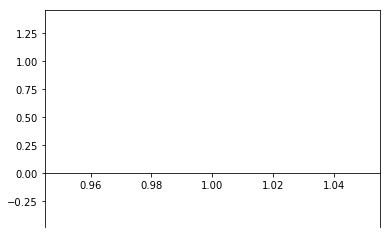

ZeroDivisionError: integer division or modulo by zero

In [163]:
#DIFFERENTIATION Problem 3

def problem3(x):
    xvec = np.array([x])
    exactd = derivative(xvec)
    hvec = np.logspace(-8, 0, 9)
    f1err = f2err = b1err = b2err = c2err = c4err = np.zeros((9,0))
    
    for i in range(9):
        
        f1d = f1(f,xvec,hvec[i])
        f1err[i] = la.norm(exactd - f1d[0])
        f2d = f2(f,xvec,hvec[i])
        f2err[i] = la.norm(exactd - f2d[0])
        b1d = b1(f,xvec,hvec[i])
        b1err[i] = la.norm(exactd - b1d[0])
        b2d = b2(f,xvec,hvec[i])
        b2err[i] = la.norm(exactd - b2d[0])
        c2d = c2(f,xvec,hvec[i])
        c2err[i] = la.norm(exactd - c2d[0])
        c4d = c4(f,xvec,hvec[i])
        c4err[i] = la.norm(exactd - c4d[0])

    plt.plot(hvec, f1err)
    plt.plot(hvec, f2err)
    plt.plot(hvec, b1err)
    plt.plot(hvec, b2err)
    plt.plot(hvec, c2err)
    plt.plot(hvec, c4err)

    plt.show()

point = np.array([1])
problem3(point)

